# Solving Travelling Salesman Problem by Self Organizing Maps

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

## Essential Definitons

Using self organizing maps, we can train a neural network to identify the least distances among any set of points. 
We use it in the travelling salesman problem to find the least distance route to cover all cities.

The resources used in same are:

https://github.com/diego-vicente/som-tsp](https://github.com/diego-vicente/som-tsp)


In [2]:
def euclidean_distance(a, b):
    """Return the array of distances of two numpy arrays of points."""
    return np.linalg.norm(a - b, axis=1)

In [3]:
def get_neighborhood(center, radix, domain):

    # Impose an upper bound on the radix to prevent NaN and blocks
    if radix < 1:
        radix = 1

    # Compute the circular network distance to the center
    deltas = np.absolute(center - np.arange(domain))
    distances = np.minimum(deltas, domain - deltas)

    # Compute Gaussian distribution around the given center
    return np.exp(-(distances*distances) / (2*(radix*radix)))

In [4]:
def plot_network(cities, neurons, ax=None):
    """Plot a graphical representation of the problem"""
    mpl.rcParams['agg.path.chunksize'] = 10000

    if not ax:
        fig = plt.figure(figsize=(5, 5), frameon = False)
        axis = fig.add_axes([0,0,1,1])

        axis.set_aspect('equal', adjustable='datalim')
        plt.axis('off')

        axis.scatter(cities['Longitude'], cities['Latitude'], color='red', s=20)
        axis.plot(neurons['Longitude'], neurons['Latitude'], 'r.', ls='-', markersize=10)

        # plt.savefig(name, bbox_inches='tight', pad_inches=0, dpi=200)
        # plt.close()

    else:
        ax.scatter(cities['Longitude'], cities['Latitude'], color='red', s=20)
        ax.plot(neurons[:,0], neurons[:,1], 'r.', ls='-', markersize=2)
        return ax


In [5]:
def plot_route(cities, route, ax=None):
    """Plot a graphical representation of the route obtained"""
    mpl.rcParams['agg.path.chunksize'] = 10000

    if not ax:
        fig = plt.figure(figsize=(5, 5), frameon = False)
        axis = fig.add_axes([0,0,1,1])

        axis.set_aspect('equal', adjustable='datalim')
        plt.axis('off')

        axis.scatter(cities['Longitude'], cities['Latitude'], color='red', s=20)
        route = cities.reindex(route)
        route.loc[route.shape[0]] = route.iloc[0]
        axis.plot(route['Longitude'], route['Latitude'], color='purple', linewidth=1)

        # plt.savefig(name, bbox_inches='tight', pad_inches=0, dpi=200)
        # plt.close()

    else:
        ax.scatter(cities['Longitude'], cities['Latitude'], color='red', s=20)
        route = cities.reindex(route)
        route.loc[route.shape[0]] = route.iloc[0]
        ax.plot(route['Longitude'], route['Latitude'], color='purple', linewidth=1)
        return ax


## SOM Code Begins

Here we are using the same dataset which was also used in the other examples, namely, QAOA and Annealing to draw comparisons among them.
The file contains 7 datapoints having *Latitudes* and *Longitudes* of different locations in Mumbai, India.

Completed 0 iterations. The network is-


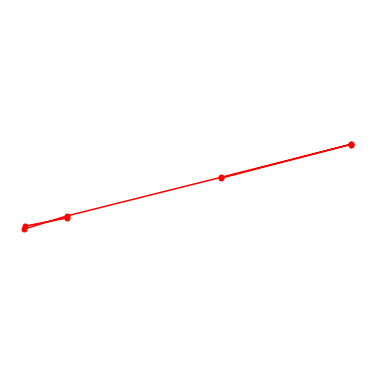

Completed 1 iterations. The network is-


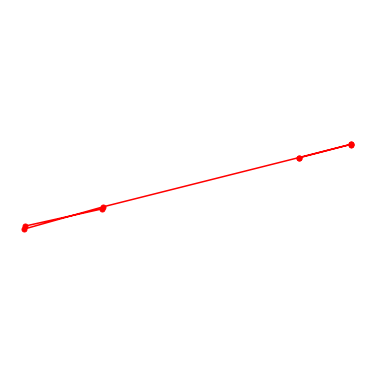

Completed 3 iterations. The network is-


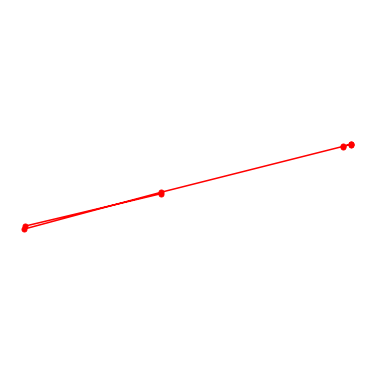

Completed 5 iterations. The network is-


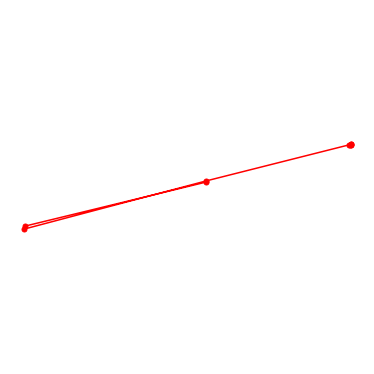

Completed 10 iterations. The network is-


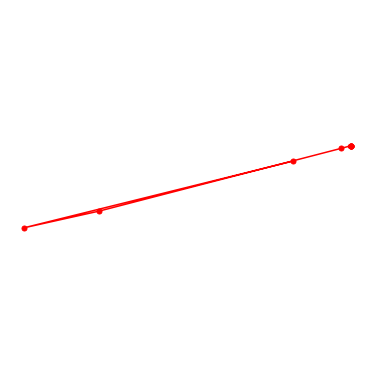

Completed 50 iterations. The network is-


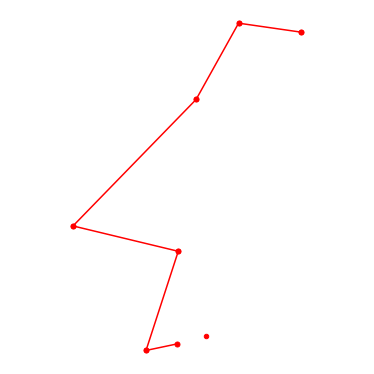

Completed 100 iterations. The network is-


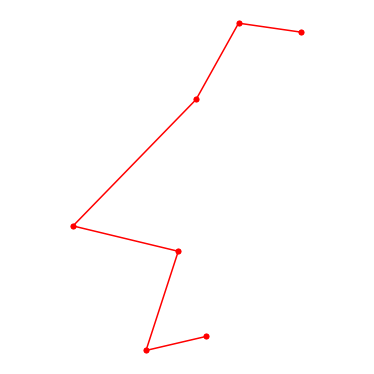

Completed 500 iterations. The network is-


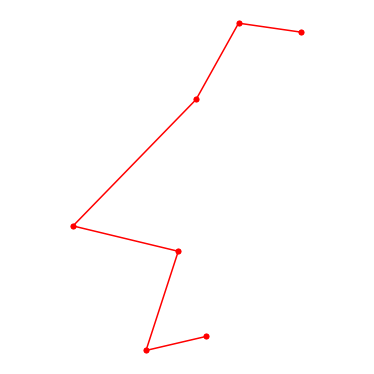

Completed 1000 iterations. The final network is-


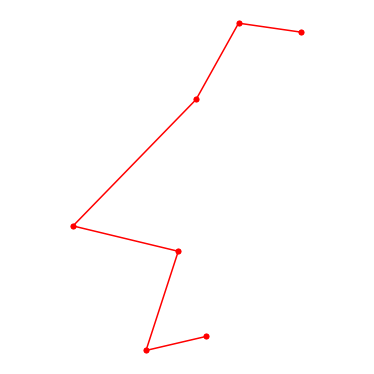

Final Route is:


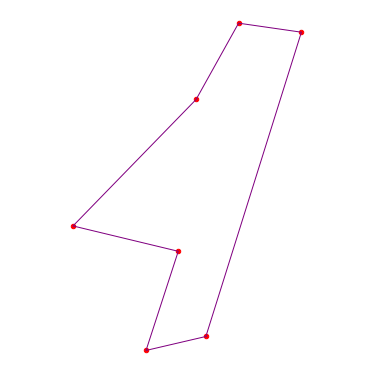

Length of Route: 12.00294886811274


In [6]:
f = open('Dataset/locations_mumbai.csv')
cities = pd.read_csv(f)
cities = cities[['Longitude', 'Latitude']]

eta = 1
radii = 1
iterations = 1000
np.random.seed(100)

city = cities
network = np.random.rand(len(city),2)

for i in range(iterations):
    winner  = euclidean_distance(network, city.sample(1).values).argmin()
    gaussian= get_neighborhood(winner, int(radii), len(city))
    network+= gaussian[:, np.newaxis]*eta*(city - network)
    eta = eta*0.99997
    radii = radii*0.9997
    
    if radii < 0.1 or eta<0.001:
        print(f"Radius/Rate has decayed at {i} iterations. Can't computer further.")
        break   
    
    A = [0, 1, 3, 5, 10, 50, 100, 500, 1000] # Chosen points to show how it is trained.
    if i in A:
        print(f'Completed {i} iterations. The network is-')
        plot_network(cities, network)
        plt.show()
else:
    print('Completed {} iterations. The final network is-'.format(iterations))
    plot_network(city, network)
    plt.show()

city['winner'] = city.apply(lambda c: (euclidean_distance(network, c).argmin()), axis=1, raw=True)
route = city.sort_values('winner').index
print('Final Route is:')
plot_route(cities, route)
plt.show()
                            
cities = cities.reindex(route)
distance = np.sum(euclidean_distance(cities, np.roll(cities, 1, axis=0)))
print('Length of Route:', distance)

SInce we gave 1000 iterations, it was able to converge well. But, with 10000 iterations, radius decays before 8000 iterations thus sjowing a limit to its convergence.

*SOM* are very good and fast in solving TSP and works even on dataset as large as 20000 cities but might not converge in each case which is a limitation.

*We aim to create a Quantum SOM that will be free from this limitaion as that would be fster and using parallelism will take less iterations.*